In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\original\TensorFlow_FILES\DATA\kc_house_data.csv')

In [3]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.width',1000)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


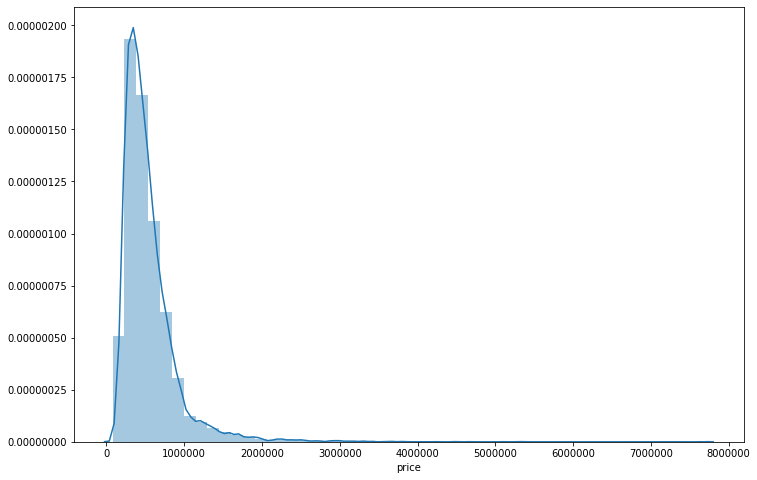

In [8]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'])

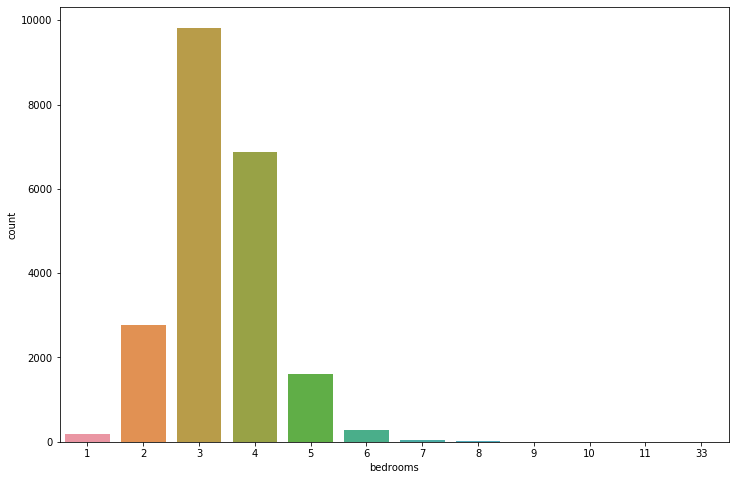

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(df['bedrooms'])

In [10]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

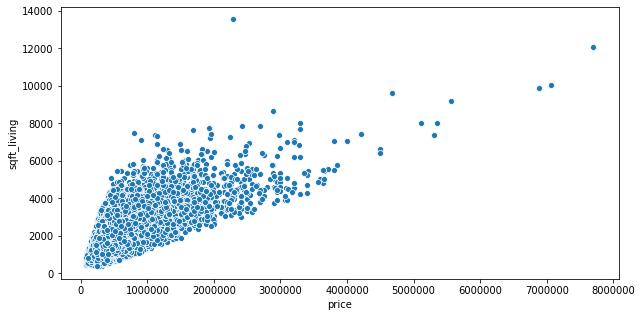

In [11]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)

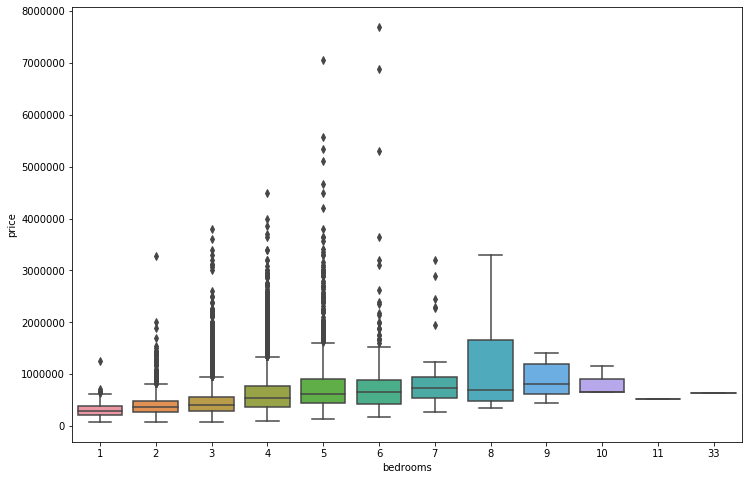

In [12]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)

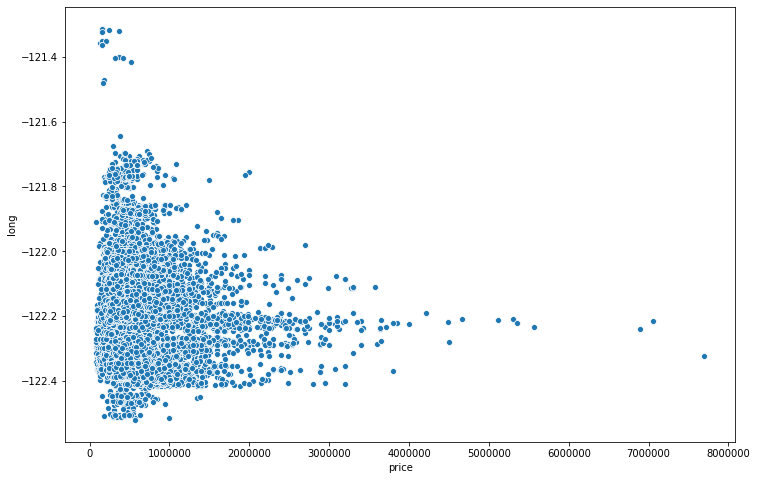

In [13]:
plt.figure(figsize =(12,8))
sns.scatterplot(x = 'price', y = 'long', data = df)

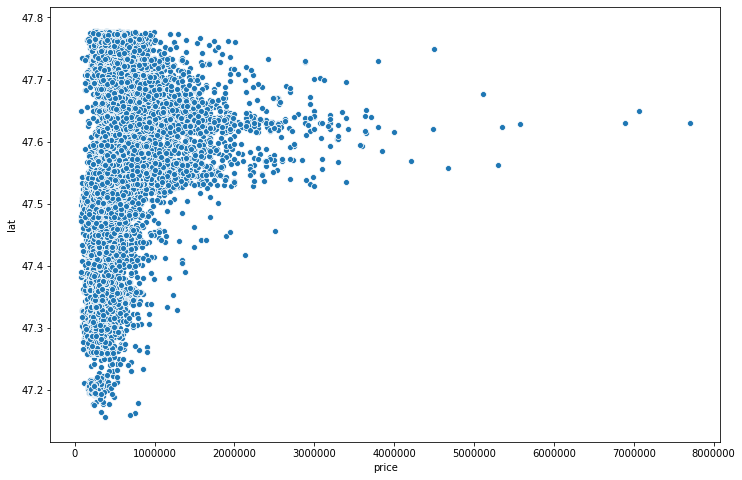

In [14]:
plt.figure(figsize =(12,8))
sns.scatterplot(x = 'price', y = 'lat', data = df)

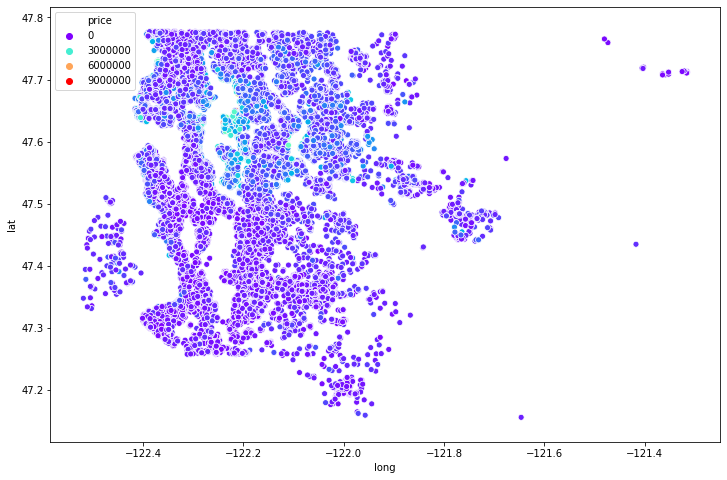

In [15]:
plt.figure(figsize =(12,8))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price', palette = 'rainbow')

In [16]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [17]:
non_top_1_per = df.sort_values('price', ascending = False).iloc[216:]

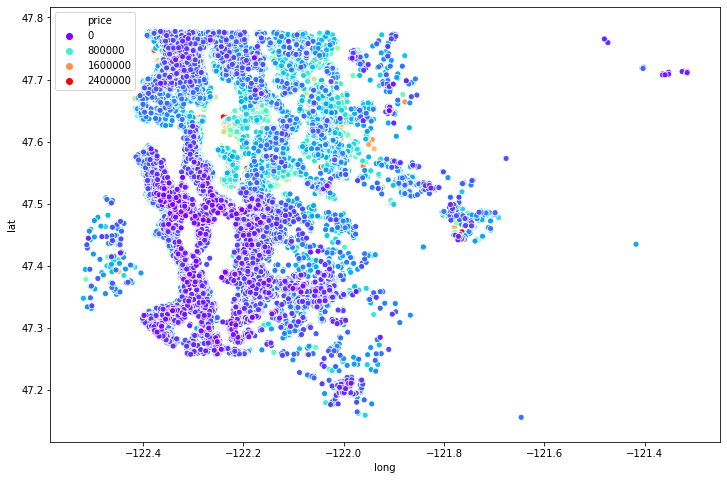

In [18]:
plt.figure(figsize =(12,8))
sns.scatterplot(x = 'long', y = 'lat', data = non_top_1_per, hue = 'price', palette = 'rainbow')

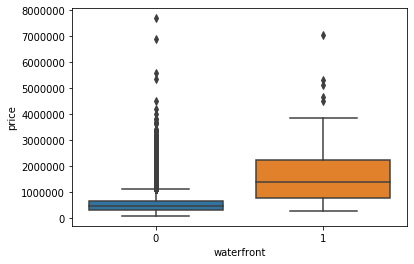

In [19]:
sns.boxplot(x = 'waterfront', y = 'price', data = df )

In [20]:
df = df.drop('id', axis = 1,)

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['year'] = df['date'].apply(lambda date: date.year)

In [23]:
df['month'] = df['date'].apply(lambda date: date.month)

In [24]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


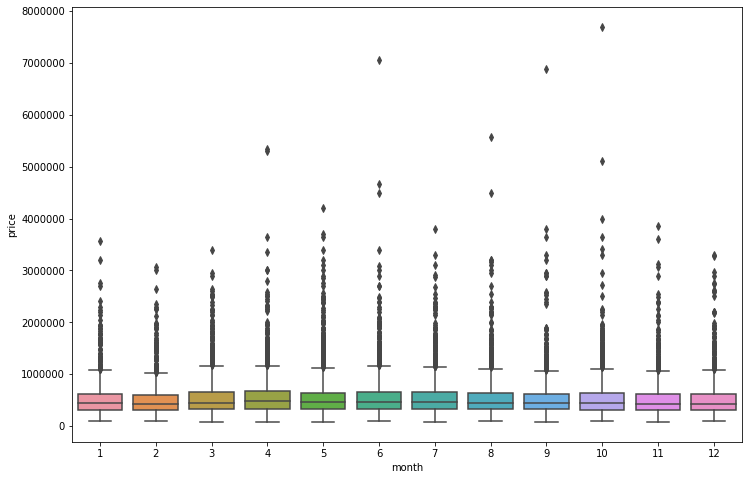

In [25]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'month', y = 'price', data = df)

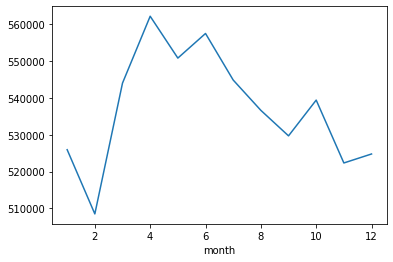

In [26]:
df.groupby('month').mean()['price'].plot()

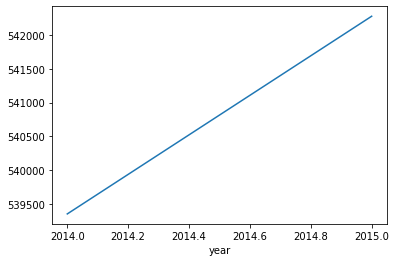

In [27]:
df.groupby('year').mean()['price'].plot()

In [28]:
df = df.drop('date', axis = 1)

In [29]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [30]:
df = df.drop('zipcode', axis = 1)

In [31]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


In [32]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.fit_transform(X_test)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
model = Sequential()

model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [44]:
model.fit(X_train, y_train, validation_data = (X_test, y_test),
           batch_size = 128, epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 136us/sample - loss: 430224769141.0518 - val_loss: 418846324316.2864
Epoch 2/400
15117/15117 [==============================] - 1s 53us/sample - loss: 428570972618.1819 - val_loss: 413785052744.0593
Epoch 3/400
15117/15117 [==============================] - 1s 44us/sample - loss: 409232570046.7849 - val_loss: 373778773879.4667
Epoch 4/400
15117/15117 [==============================] - 1s 41us/sample - loss: 324312940784.6065 - val_loss: 248623274110.4197
Epoch 5/400
15117/15117 [==============================] - 1s 42us/sample - loss: 173295685128.8398 - val_loss: 117689842457.9160
Epoch 6/400
15117/15117 [==============================] - 1s 44us/sample - loss: 102603035496.0630 - val_loss: 96197707083.2198
Epoch 7/400
15117/15117 [==============================] - 1s 38us/sample - loss: 97698648744.3636 - val_loss: 94369880938.8247
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 1s 34us/sample - loss: 40116916888.1064 - val_loss: 43700528347.9704
Epoch 65/400
15117/15117 [==============================] - 1s 42us/sample - loss: 39895801951.5110 - val_loss: 43732933037.8272
Epoch 66/400
15117/15117 [==============================] - 0s 33us/sample - loss: 39663931614.3849 - val_loss: 43659907714.2123
Epoch 67/400
15117/15117 [==============================] - 0s 31us/sample - loss: 39429838188.6353 - val_loss: 42607771749.1358
Epoch 68/400
15117/15117 [==============================] - 0s 32us/sample - loss: 39228751054.5341 - val_loss: 42942731165.3926
Epoch 69/400
15117/15117 [==============================] - 1s 34us/sample - loss: 38999500199.7709 - val_loss: 43324628840.2963
Epoch 70/400
15117/15117 [==============================] - 1s 40us/sample - loss: 38787566927.3724 - val_loss: 42283324747.2197
Epoch 71/400
15117/15117 [==============================] - 1s 36us/sample - loss: 38576424544.0868 - val_loss

15117/15117 [==============================] - 1s 37us/sample - loss: 33424266280.1688 - val_loss: 35104803614.9728
Epoch 128/400
15117/15117 [==============================] - 1s 48us/sample - loss: 33362282702.4664 - val_loss: 35600736953.8370
Epoch 129/400
15117/15117 [==============================] - 1s 41us/sample - loss: 33344575913.6675 - val_loss: 35040730756.7407
Epoch 130/400
15117/15117 [==============================] - 1s 55us/sample - loss: 33318649056.3493 - val_loss: 35537677102.1432
Epoch 131/400
15117/15117 [==============================] - 0s 31us/sample - loss: 33262056524.8830 - val_loss: 35397791000.6519
Epoch 132/400
15117/15117 [==============================] - 1s 41us/sample - loss: 33248394462.5203 - val_loss: 35075846047.9210
Epoch 133/400
15117/15117 [==============================] - 1s 41us/sample - loss: 33190998793.1955 - val_loss: 34630354569.7975
Epoch 134/400
15117/15117 [==============================] - 1s 35us/sample - loss: 33159632152.0979 - v

15117/15117 [==============================] - 1s 48us/sample - loss: 31780831265.0563 - val_loss: 34387995524.1086
Epoch 191/400
15117/15117 [==============================] - 1s 54us/sample - loss: 31745288659.3943 - val_loss: 34668717624.8889
Epoch 192/400
15117/15117 [==============================] - 1s 56us/sample - loss: 31716982033.4595 - val_loss: 34146485467.9704
Epoch 193/400
15117/15117 [==============================] - 1s 54us/sample - loss: 31701200958.9628 - val_loss: 33835384376.8889
Epoch 194/400
15117/15117 [==============================] - 1s 55us/sample - loss: 31696064988.6067 - val_loss: 33948337164.6420
Epoch 195/400
15117/15117 [==============================] - 1s 56us/sample - loss: 31691623182.6484 - val_loss: 33847677979.8124
Epoch 196/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31647011698.3592 - val_loss: 34278821159.8222
Epoch 197/400
15117/15117 [==============================] - 1s 54us/sample - loss: 31649760374.7453 - v

15117/15117 [==============================] - 1s 48us/sample - loss: 30741571494.2467 - val_loss: 34325249289.4815
Epoch 254/400
15117/15117 [==============================] - 1s 43us/sample - loss: 30783245923.6092 - val_loss: 33384840245.0963
Epoch 255/400
15117/15117 [==============================] - 1s 48us/sample - loss: 30729173999.6751 - val_loss: 33841827850.1136
Epoch 256/400
15117/15117 [==============================] - 1s 48us/sample - loss: 30757236606.0779 - val_loss: 33376346162.5679
Epoch 257/400
15117/15117 [==============================] - 1s 57us/sample - loss: 30684598595.2472 - val_loss: 34118937000.7704
Epoch 258/400
15117/15117 [==============================] - 1s 56us/sample - loss: 30679072190.0568 - val_loss: 33772739010.0543
Epoch 259/400
15117/15117 [==============================] - 1s 53us/sample - loss: 30684135305.9999 - val_loss: 32648645826.6864
Epoch 260/400
15117/15117 [==============================] - 1s 57us/sample - loss: 30660634316.6036 - v

Epoch 316/400
15117/15117 [==============================] - 1s 54us/sample - loss: 30036626311.0871 - val_loss: 33187965332.5432
Epoch 317/400
15117/15117 [==============================] - 1s 54us/sample - loss: 30052211296.8997 - val_loss: 33076252232.0593
Epoch 318/400
15117/15117 [==============================] - 1s 55us/sample - loss: 29996863914.7175 - val_loss: 33195045308.9975
Epoch 319/400
15117/15117 [==============================] - 1s 55us/sample - loss: 29998365185.7273 - val_loss: 34799055657.0864
Epoch 320/400
15117/15117 [==============================] - 1s 53us/sample - loss: 29994159146.4719 - val_loss: 34339271181.9062
Epoch 321/400
15117/15117 [==============================] - 1s 51us/sample - loss: 29960846282.6900 - val_loss: 32565114622.1037
Epoch 322/400
15117/15117 [==============================] - 1s 47us/sample - loss: 30005171154.2089 - val_loss: 33623726540.1679
Epoch 323/400
15117/15117 [==============================] - 1s 48us/sample - loss: 299574

15117/15117 [==============================] - 1s 43us/sample - loss: 29323590631.2755 - val_loss: 33897660153.0469
Epoch 380/400
15117/15117 [==============================] - 1s 44us/sample - loss: 29316396892.0733 - val_loss: 33755293473.5012
Epoch 381/400
15117/15117 [==============================] - 1s 49us/sample - loss: 29312977625.2706 - val_loss: 34209392210.1728
Epoch 382/400
15117/15117 [==============================] - 1s 46us/sample - loss: 29314837223.1570 - val_loss: 33744415443.1210
Epoch 383/400
15117/15117 [==============================] - 1s 42us/sample - loss: 29248613361.8427 - val_loss: 32972985027.9506
Epoch 384/400
15117/15117 [==============================] - 1s 41us/sample - loss: 29236847829.9176 - val_loss: 34094935487.5259
Epoch 385/400
15117/15117 [==============================] - 1s 37us/sample - loss: 29228321413.7154 - val_loss: 32973405601.1852
Epoch 386/400
15117/15117 [==============================] - 1s 39us/sample - loss: 29254599013.7260 - v

In [52]:
losses = pd.DataFrame(model.history.history)

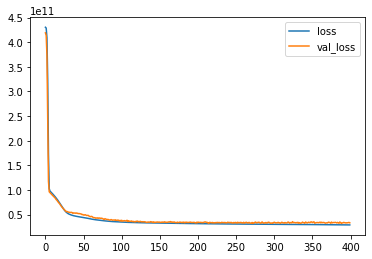

In [53]:
losses.plot()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [55]:
y_pred = model.predict(X_test)

In [56]:
y_pred

array([[354433.66],
       [526499.6 ],
       [467192.47],
       ...,
       [291964.97],
       [464589.03],
       [590944.6 ]], dtype=float32)

In [57]:
mean_squared_error(y_test, y_pred)

33250650318.173958

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

182347.60847944772

In [59]:
mean_absolute_error(y_pred, y_test)

110982.3908311632

In [60]:
explained_variance_score(y_test, y_pred)

0.7871647105828538

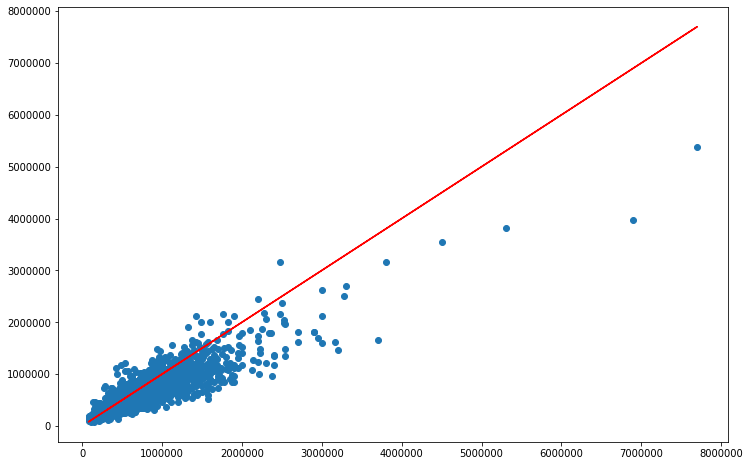

In [64]:
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, 'r')

In [67]:
single_house = df.drop('price', axis = 1).iloc[0]

In [70]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [71]:
model.predict(single_house)

array([[242241.34]], dtype=float32)

In [72]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
